In [2]:
library(mice)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks mice::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [13]:
data <- read_csv("data/thanksgiving-2015-poll-data.csv")

Warning message:
“Duplicated column names deduplicated: 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)' => 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)_1' [26], 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)' => 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)_1' [39], 'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify)' => 'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify)_1' [51]”Parsed with column specification:
cols(
  .default = col_character(),
  RespondentID = col_double()
)
See spec(...) for full column specific

In [14]:
head(data)

RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),⋯,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4337954960,Yes,Turkey,NA,Baked,NA,Bread-based,NA,None,NA,⋯,Yes,No,No,No,NA,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
4337951949,Yes,Turkey,NA,Baked,NA,Bread-based,NA,Other (please specify),Homemade cranberry gelatin ring,⋯,No,No,Yes,No,NA,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
4337935621,Yes,Turkey,NA,Roasted,NA,Rice-based,NA,Homemade,NA,⋯,Yes,Yes,Yes,No,NA,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
4337933040,Yes,Turkey,NA,Baked,NA,Bread-based,NA,Homemade,NA,⋯,Yes,No,No,No,NA,Urban,30 - 44,Male,"$200,000 and up",Pacific
4337931983,Yes,Tofurkey,NA,Baked,NA,Bread-based,NA,Canned,NA,⋯,Yes,No,No,No,NA,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific
4337929779,Yes,Turkey,NA,Roasted,NA,Rice-based,NA,Homemade,NA,⋯,Yes,Yes,Yes,No,NA,Urban,18 - 29,Male,"$0 to $9,999",Pacific


,RespondentID,Do you celebrate Thanksgiving?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,What is typically the main dish at your Thanksgiving dinner?,How is the main dish typically cooked?,What kind of stuffing/dressing do you typically have?,What type of cranberry saucedo you typically have?,⋯,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,What kind of stuffing/dressing do you typically have? - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,What type of cranberry saucedo you typically have? - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,33
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,32
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,33
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,0,0,0,0,1,0,0,15
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,1,0,0,0,0,25
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,25
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,24
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,0,1,0,0,0,0,0,28
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,0,0,0,0,0,0,0,29
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,0,1,0,0,1,0,0,19


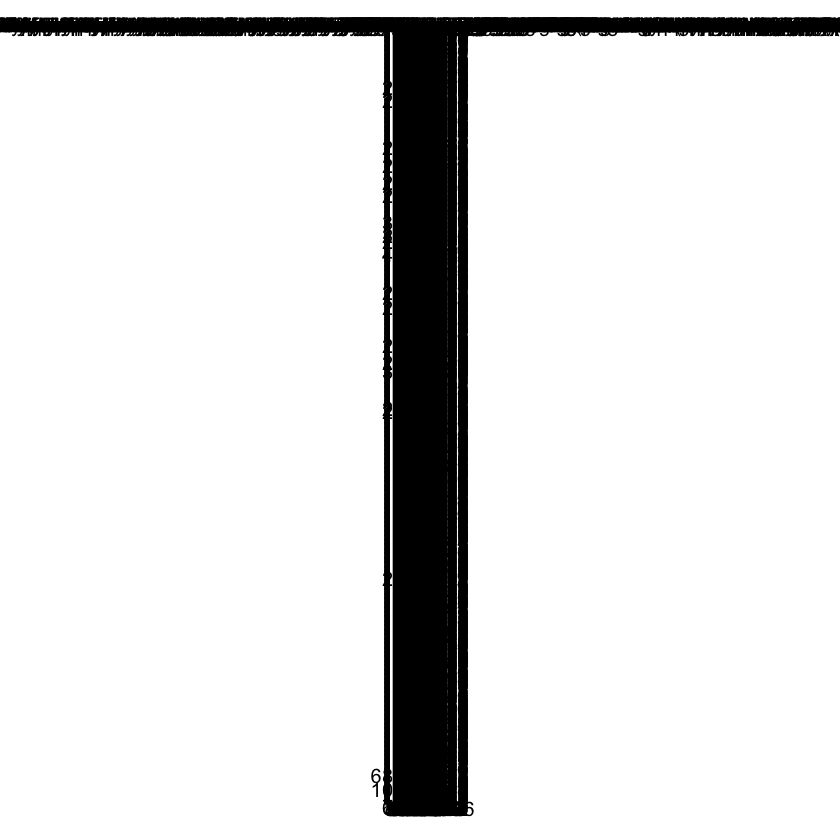

In [15]:
md.pattern(data, plot = TRUE, rotate.names = FALSE)